In [74]:
import pandas as pd
import requests
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from config import api_key

In [75]:
response = requests.get(f'https://api.census.gov/data/2018/abstcb?get=GEO_ID,NAME,EMP,RACE_GROUP,RACE_GROUP_LABEL,FIRMPDEMP,IMPACTWF_U,IMPACTWF_U_LABEL&for=us:*&NAICS2017=00&key={api_key}')

In [76]:
html = response.text
# html

In [77]:
response

<Response [200]>

In [6]:
census_json = response.json()
print(type(census_json))
# census_json

<class 'list'>


In [7]:
df = pd.DataFrame(census_json)
#this replaces the column names with the values of the 0th row
df.columns = df.loc[0]
#Drop looks for rows by default, so we don't need to specify. this will remove the 0'th row
df.drop(0, inplace=True)


In [8]:
df.shape

(495, 10)

In [9]:
employee_by_state = df[['NAME', 'EMP']]
employee_by_state.EMP = employee_by_state.EMP.astype(int)


sorted_employees = employee_by_state.sort_values(by='EMP', ascending=True)
sorted_employees.tail()

C:\Users\nolan\AppData\Local\Temp\ipykernel_6032\1065454604.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employee_by_state.EMP = employee_by_state.EMP.astype(int)


,NAME,EMP
28,United States,33599954
14,United States,35732012
25,United States,38244729
22,United States,50469228
33,United States,52307942


In [10]:
df.columns

Index(['GEO_ID', 'NAME', 'EMP', 'RACE_GROUP', 'RACE_GROUP_LABEL', 'FIRMPDEMP',
       'IMPACTWF_U', 'IMPACTWF_U_LABEL', 'NAICS2017', 'us'],
      dtype='object', name=0)

In [11]:
df.IMPACTWF_U_LABEL.unique()

array(['Artificial Intelligence: Increased number of workers employed by this business',
       'Artificial Intelligence: Decreased number of workers employed by this business',
       'Artificial Intelligence: Did not change number of workers employed by this business',
       'Artificial Intelligence: Increased skill level of workers employed by this business',
       'Artificial Intelligence: Decreased skill level of workers employed by this business',
       'Artificial Intelligence: Did not change skill level of workers employed by this business',
       'Artificial Intelligence: Increased STEM skills of workers employed by this business',
       'Artificial Intelligence: Decreased STEM skills of workers employed by this business',
       'Artificial Intelligence: Did not change STEM skills of workers employed by this business',
       'Artificial Intelligence: Not applicable, did not employ workers with STEM skills',
       'Artificial Intelligence: Total Reporting',
       'Clou

In [12]:
df_data_list = ['Specialized Software: Increased skill level of workers employed by this business']

In [13]:
df_spec_soft = df[df.IMPACTWF_U_LABEL.isin(df_data_list)]

In [14]:
df_spec_soft.describe()

,GEO_ID,NAME,EMP,RACE_GROUP,RACE_GROUP_LABEL,FIRMPDEMP,IMPACTWF_U,IMPACTWF_U_LABEL,NAICS2017,us
count,9,9,9,9,9,9,9,9,9,9
unique,1,1,9,9,9,9,1,1,1,1
top,0100000US,United States,18143891,00,Total,458793,T3E11D04,Specialized Software: Increased skill level of...,00,1
freq,9,9,1,1,1,1,9,9,9,9


In [15]:
df.RACE_GROUP_LABEL.unique()

array(['Total', 'White', 'Black or African American',
       'American Indian and Alaska Native', 'Asian',
       'Native Hawaiian and Other Pacific Islander', 'Minority',
       'Equally minority/nonminority', 'Nonminority'], dtype=object)

In [16]:
df_race_list = ['White', 'Black or African American',
       'American Indian and Alaska Native', 'Asian',
       'Native Hawaiian and Other Pacific Islander',
       'Equally minority/nonminority']

In [17]:
df_spec_soft = df_spec_soft[df_spec_soft.RACE_GROUP_LABEL.isin(df_race_list)]

In [18]:
df_spec_soft.EMP = df_spec_soft.EMP.astype(int)
df_spec_soft = df_spec_soft.sort_values(by='EMP', ascending=True)
df_spec_soft.tail()

,GEO_ID,NAME,EMP,RACE_GROUP,RACE_GROUP_LABEL,FIRMPDEMP,IMPACTWF_U,IMPACTWF_U_LABEL,NAICS2017,us
191,0100000US,United States,22199,50,American Indian and Alaska Native,2346,T3E11D04,Specialized Software: Increased skill level of...,00,1
411,0100000US,United States,80702,91,Equally minority/nonminority,7319,T3E11D04,Specialized Software: Increased skill level of...,00,1
92,0100000US,United States,186196,40,Black or African American,11513,T3E11D04,Specialized Software: Increased skill level of...,00,1
246,0100000US,United States,547573,60,Asian,39330,T3E11D04,Specialized Software: Increased skill level of...,00,1
136,0100000US,United States,7342811,30,White,399933,T3E11D04,Specialized Software: Increased skill level of...,00,1


In [56]:
race_sums = df_spec_soft.groupby(['RACE_GROUP_LABEL'])['EMP'].sum()
race_sums = race_sums.sort_values(ascending=True)
race_sums

RACE_GROUP_LABEL
Native Hawaiian and Other Pacific Islander       4372
American Indian and Alaska Native               22199
Equally minority/nonminority                    80702
Black or African American                      186196
Asian                                          547573
White                                         7342811
Name: EMP, dtype: int32

In [65]:
df_data_list_2 =['Specialized Equipment: Increased number of workers employed by this business',
       'Specialized Equipment: Decreased number of workers employed by this business',
       'Specialized Equipment: Did not change number of workers employed by this business',
       'Specialized Equipment: Increased skill level of workers employed by this business',
       'Specialized Equipment: Decreased skill level of workers employed by this business',
       'Specialized Equipment: Did not change skill level of workers employed by this business',
       'Specialized Equipment: Increased STEM skills of workers employed by this business',
       'Specialized Equipment: Decreased STEM skills of workers employed by this business',
       'Specialized Equipment: Did not change STEM skills of workers employed by this business',
       'Specialized Equipment: Not applicable, did not employ workers with STEM skills',
       'Specialized Equipment: Total Reporting']

In [66]:
df_spec_soft_2 = df[df.IMPACTWF_U_LABEL.isin(df_data_list_2)]

In [67]:
df_spec_soft_2 = df_spec_soft_2[df_spec_soft_2.RACE_GROUP_LABEL.isin(df_race_list)]

In [68]:
df_spec_soft_2.EMP = df_spec_soft_2.EMP.astype(int)
df_spec_soft_2 = df_spec_soft_2.sort_values(by='EMP', ascending=True)
df_spec_soft_2.tail()

,GEO_ID,NAME,EMP,RACE_GROUP,RACE_GROUP_LABEL,FIRMPDEMP,IMPACTWF_U,IMPACTWF_U_LABEL,NAICS2017,us
164,0100000US,United States,3574446,30,White,268023,T5E17D10,"Specialized Equipment: Not applicable, did not...",00,1
163,0100000US,United States,7267100,30,White,370537,T5E17D09,Specialized Equipment: Did not change STEM ski...,00,1
160,0100000US,United States,9582415,30,White,555677,T5E17D06,Specialized Equipment: Did not change skill le...,00,1
157,0100000US,United States,10476362,30,White,659183,T5E17D03,Specialized Equipment: Did not change number o...,00,1
165,0100000US,United States,13179564,30,White,758454,T5E17D99,Specialized Equipment: Total Reporting,00,1


In [70]:
race_sums_2 = df_spec_soft_2.groupby(['RACE_GROUP_LABEL'])['EMP'].sum()
race_sums_2 = race_sums_2.sort_values(ascending=True)
race_sums_2

RACE_GROUP_LABEL
Native Hawaiian and Other Pacific Islander       23109
American Indian and Alaska Native               161761
Black or African American                       774437
Equally minority/nonminority                    783865
Asian                                          2916564
White                                         52718255
Name: EMP, dtype: int32

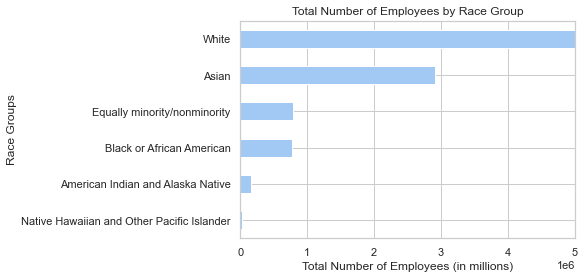

<Figure size 432x288 with 0 Axes>

In [72]:
sns.set_theme(style="whitegrid", palette='pastel')
ax = race_sums_2.plot(title = 'Total Number of Employees by Race Group',x='RACE_GROUP_LABEL', y='EMP', kind = 'barh')

ax.set_xlabel('EMP')
ax.set_ylabel('NAME')

ax.set(xlim=(0, 5000000), ylabel="Race Groups",
       xlabel="Total Number of Employees (in millions)")
ax.set_xticks([0, 1000000, 2000000, 3000000, 4000000, 5000000])

plt.show()
plt.savefig('nt-vis-2.png')

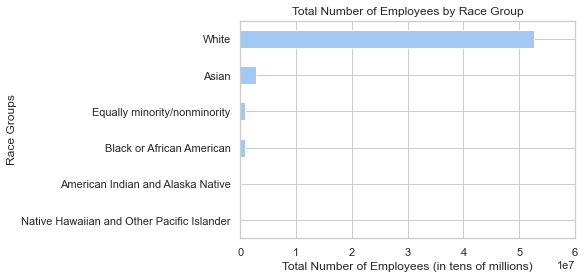

<Figure size 432x288 with 0 Axes>

In [73]:
sns.set_theme(style="whitegrid", palette='pastel')
ax = race_sums_2.plot(title = 'Total Number of Employees by Race Group',x='RACE_GROUP_LABEL', y='EMP', kind = 'barh')

ax.set_xlabel('EMP')
ax.set_ylabel('NAME')

ax.set(xlim=(0, 60000000), ylabel="Race Groups",
       xlabel="Total Number of Employees (in tens of millions)")
ax.set_xticks([0, 10000000, 20000000, 30000000, 40000000, 50000000, 60000000])

plt.show()
plt.savefig('nt-vis-1.png')

In [23]:
df_spec_soft

,GEO_ID,NAME,EMP,RACE_GROUP,RACE_GROUP_LABEL,FIRMPDEMP,IMPACTWF_U,IMPACTWF_U_LABEL,NAICS2017,us
301,0100000US,United States,4372,70,Native Hawaiian and Other Pacific Islander,292,T3E11D04,Specialized Software: Increased skill level of...,00,1
191,0100000US,United States,22199,50,American Indian and Alaska Native,2346,T3E11D04,Specialized Software: Increased skill level of...,00,1
411,0100000US,United States,80702,91,Equally minority/nonminority,7319,T3E11D04,Specialized Software: Increased skill level of...,00,1
92,0100000US,United States,186196,40,Black or African American,11513,T3E11D04,Specialized Software: Increased skill level of...,00,1
246,0100000US,United States,547573,60,Asian,39330,T3E11D04,Specialized Software: Increased skill level of...,00,1
136,0100000US,United States,7342811,30,White,399933,T3E11D04,Specialized Software: Increased skill level of...,00,1


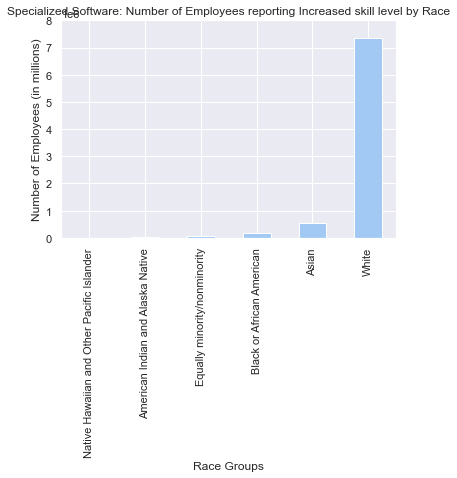

<Figure size 432x288 with 0 Axes>

In [51]:
sns.set_theme(style="darkgrid", palette='pastel')
ax = race_sums.plot(title = 'Specialized Software: Number of Employees reporting Increased skill level by Race',x='RACE_GROUP_LABEL', y='EMP', kind = 'bar')

ax.set_xlabel('EMP')
ax.set_ylabel('NAME')

ax.set(ylim=(0, 8000000), ylabel="Number of Employees (in millions)",
       xlabel="Race Groups")

plt.xticks(rotation=90)
plt.show()
plt.savefig('nt-vis-3.png')

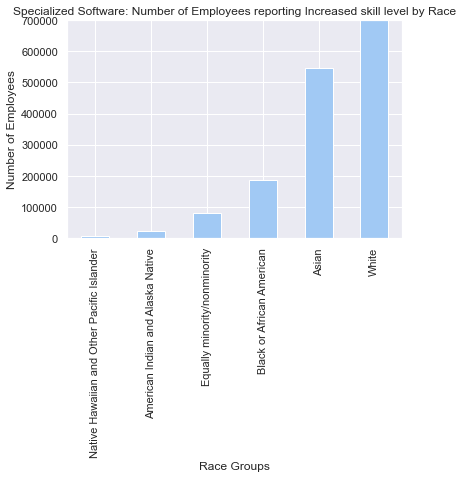

<Figure size 432x288 with 0 Axes>

In [52]:
sns.set_theme(style="darkgrid", palette='pastel')
ax = race_sums.plot(title = 'Specialized Software: Number of Employees reporting Increased skill level by Race',x='RACE_GROUP_LABEL', y='EMP', kind = 'bar')

ax.set_xlabel('EMP')
ax.set_ylabel('NAME')

ax.set(ylim=(0, 700000), ylabel="Number of Employees",
       xlabel="Race Groups")


plt.xticks(rotation=90)
plt.show()
plt.savefig('nt-vis-4.png')

In [26]:
response_3 = requests.get(f'https://api.census.gov/data/2018/abstcb?get=GEO_ID,NAME,EMP,RACE_GROUP,RACE_GROUP_LABEL,FIRMPDEMP,TECHUSE,TECHUSE_LABEL&for=us:*&NAICS2017=00&key={api_key}')

In [27]:
html = response_3.text

In [28]:
response_3

<Response [200]>

In [29]:
census_json_3 = response_3.json()
print(type(census_json_3))


<class 'list'>


In [30]:
df_3 = pd.DataFrame(census_json_3)
#this replaces the column names with the values of the 0th row
df_3.columns = df_3.loc[0]
#Drop looks for rows by default, so we don't need to specify. this will remove the 0'th row
df_3.drop(0, inplace=True)

In [31]:
df_3.shape

(360, 10)

In [32]:
df_3.columns

Index(['GEO_ID', 'NAME', 'EMP', 'RACE_GROUP', 'RACE_GROUP_LABEL', 'FIRMPDEMP',
       'TECHUSE', 'TECHUSE_LABEL', 'NAICS2017', 'us'],
      dtype='object', name=0)

In [33]:
df_3.TECHUSE_LABEL.unique()

array(['Artificial Intelligence: Did not use',
       'Artificial Intelligence: Tested, but did not use in production or service',
       'Artificial Intelligence: Low use',
       'Artificial Intelligence: Moderate use',
       'Artificial Intelligence: High use',
       "Artificial Intelligence: Don't know",
       'Artificial Intelligence: Total use',
       'Artificial Intelligence: Total Reporting',
       'Cloud-Based: Did not use', 'Robotics: High use',
       "Robotics: Don't know", 'Robotics: Total use',
       'Robotics: Total Reporting', 'Specialized Equipment: Did not use',
       'Specialized Equipment: Tested, but did not use in production or service',
       'Specialized Equipment: Low use',
       'Specialized Equipment: Moderate use',
       'Specialized Equipment: High use',
       "Specialized Equipment: Don't know",
       'Specialized Equipment: Total use',
       'Specialized Equipment: Total Reporting',
       'Cloud-Based: Tested, but did not use in production o

In [34]:
df_3_data_list = ['Specialized Software: High use']

In [35]:
df_3_tech_use = df_3[df_3.TECHUSE_LABEL.isin(df_3_data_list)]

In [36]:
df_3_race_list = ['White', 'Black or African American',
       'American Indian and Alaska Native', 'Asian',
       'Native Hawaiian and Other Pacific Islander',
       'Equally minority/nonminority']

In [37]:
df_3_tech_use = df_3_tech_use[df_3_tech_use.RACE_GROUP_LABEL.isin(df_3_race_list)]

In [38]:
df_3_tech_use.EMP = df_3_tech_use.EMP.astype(int)
df_3_tech_use = df_3_tech_use.sort_values(by='EMP', ascending=True)
df_3_tech_use.tail(20)

,GEO_ID,NAME,EMP,RACE_GROUP,RACE_GROUP_LABEL,FIRMPDEMP,TECHUSE,TECHUSE_LABEL,NAICS2017,us
221,0100000US,United States,7279,70,Native Hawaiian and Other Pacific Islander,739,T3E03B05,Specialized Software: High use,00,1
105,0100000US,United States,42017,50,American Indian and Alaska Native,3963,T3E03B05,Specialized Software: High use,00,1
131,0100000US,United States,188358,40,Black or African American,16148,T3E03B05,Specialized Software: High use,00,1
301,0100000US,United States,206154,91,Equally minority/nonminority,14785,T3E03B05,Specialized Software: High use,00,1
169,0100000US,United States,757385,60,Asian,55644,T3E03B05,Specialized Software: High use,00,1
63,0100000US,United States,12916602,30,White,719143,T3E03B05,Specialized Software: High use,00,1


In [39]:
race_sums_3 = df_3_tech_use.groupby(['RACE_GROUP_LABEL'])['EMP'].sum()
race_sums_3 = race_sums_3.sort_values(ascending=True)
race_sums_3

RACE_GROUP_LABEL
Native Hawaiian and Other Pacific Islander        7279
American Indian and Alaska Native                42017
Black or African American                       188358
Equally minority/nonminority                    206154
Asian                                           757385
White                                         12916602
Name: EMP, dtype: int32

In [40]:
df_data_list_4 = ['Specialized Software: Moderate use']

In [42]:
df_tech_use_4 = df_3[df_3.TECHUSE_LABEL.isin(df_data_list_4)]

In [43]:
df_tech_use_4 = df_tech_use_4[df_tech_use_4.RACE_GROUP_LABEL.isin(df_race_list)]

In [45]:
df_3_tech_use.EMP = df_3_tech_use.EMP.astype(int)
df_3_tech_use = df_3_tech_use.sort_values(by='EMP', ascending=True)
df_3_tech_use.tail(20)

,GEO_ID,NAME,EMP,RACE_GROUP,RACE_GROUP_LABEL,FIRMPDEMP,TECHUSE,TECHUSE_LABEL,NAICS2017,us
221,0100000US,United States,7279,70,Native Hawaiian and Other Pacific Islander,739,T3E03B05,Specialized Software: High use,00,1
105,0100000US,United States,42017,50,American Indian and Alaska Native,3963,T3E03B05,Specialized Software: High use,00,1
131,0100000US,United States,188358,40,Black or African American,16148,T3E03B05,Specialized Software: High use,00,1
301,0100000US,United States,206154,91,Equally minority/nonminority,14785,T3E03B05,Specialized Software: High use,00,1
169,0100000US,United States,757385,60,Asian,55644,T3E03B05,Specialized Software: High use,00,1
63,0100000US,United States,12916602,30,White,719143,T3E03B05,Specialized Software: High use,00,1


In [46]:
labels = []
fig = px.pie(df_3_tech_use, values='EMP', labels=labels)

fig.show()

In [47]:
labels = []
fig = px.pie(df_tech_use_4, values='EMP', labels=labels)

fig.show()


In [4]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

labels = ["Native Hawaiian and Other Pacific Islander", "American Indian and Alaska Native", "Black or African American", "Equally minority/nonminority", "Asian", "White"]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=[0, 0.247, 1.08, 1.61, 5.06, 92], name="Moderate Use"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=[0.0516, 0.298, 1.33, 1.46, 5.36, 91.5], name="High Use"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Moderate & High Specialized Software Use by Race",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Mod Use', x=0.180, y=0.5, font_size=20, showarrow=False),
                 dict(text='High Use', x=0.825, y=0.5, font_size=20, showarrow=False)])
fig.show()